In [ ]:
import math
 
# Function to calculate distance
def distance(x1 , y1 , x2 , y2):
 
    # Calculating distance
    return math.sqrt(math.pow(x2 - x1, 2) +
                math.pow(y2 - y1, 2) * 1.0)
 
# Drivers Code
print("%.6f"%distance(3, 4, 4, 3))


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt


n = 40
pos = {i: (random.gauss(0, 2), random.gauss(0, 2)) for i in range(n)}
G = nx.random_geometric_graph(n, 0.2, pos=pos)

plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=100, font_size=5)
plt.show()

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Generate a connected random geometric graph
def generate_connected_geometric_graph(n, threshold):
    while True:
        pos = {i: (random.gauss(0, 5), random.gauss(0, 5)) for i in range(n)}
        G = nx.random_geometric_graph(n, threshold, pos=pos)
        if nx.is_connected(G):
            return G

n = 8
threshold = 2
G = generate_connected_geometric_graph(n, threshold)

plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=100, font_size=5)
plt.show()


In [ ]:
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')

for (u, v) in G.edges():
        G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 2)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(G, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in G.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_random_connected_graph(num_vertices):
    # Generate random vertices with coordinates in the range [0, 100]
    vertices = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_vertices)]

    # Create an empty graph
    G = nx.Graph()

    # Add vertices to the graph
    for i, (x, y) in enumerate(vertices):
        G.add_node(i, pos=(x, y))

    # Add edges to connect the vertices to form a connected graph
    for i in range(num_vertices):
        for j in range(i+1, num_vertices):
            if random.random() < 0.3:  # Adjust this probability as needed
                G.add_edge(i, j)

    # Check if the graph is connected
    if not nx.is_connected(G):
        # If not connected, add additional edges to make it connected
        components = list(nx.connected_components(G))
        for i in range(len(components)-1):
            v1 = random.choice(list(components[i]))
            v2 = random.choice(list(components[i+1]))
            G.add_edge(v1, v2)

    return G

# Generate a random connected graph with 10 vertices
graph = generate_random_connected_graph(10)

# Draw the graph
pos = nx.get_node_attributes(graph, 'pos')
nx.draw(graph, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10)
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from collections import deque


def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def generate_random_connected_graph(n):
    # Generate a random connected graph with n nodes
    G = nx.connected_watts_strogatz_graph(n, 4, 0,1)  # Small-world graph
    
    # Assign positions to nodes
    pos = nx.spring_layout(G)
    nx.set_node_attributes(G, pos, 'pos')
    
    # Assign weights to edges based on Euclidean distances
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 2)
    
    return G


def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = deque([start])
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.popleft()
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

# Create a sample graph
G = generate_random_connected_graph(6)

for (u, v) in G.edges():
    print(f"u: {u} in v: {v} razdalja: {G.edges[u, v]['weight']}")

# Calculate shortest paths and distances from vertex 0
shortest_paths, distances = bfs_shortest_paths(G, 0)

# Print shortest paths and distances to all vertices
for vertex, path in shortest_paths.items():
    print(f"Shortest path to vertex {vertex}: {path}, distance: {distances[vertex]}")


# Draw the graph
pos = nx.get_node_attributes(G, 'pos')  # Get positions

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(G, pos, ax=ax, with_labels=True, node_size=500, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in G.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


In [ ]:
def vsota_razdalj(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    vsota = 0
    for vertex, path in shortest_paths.items():
        vsota =+ distances[vertex]
    return vsota


def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = round(euclidean_distance(pos[v1], pos[v2]), 2)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            print('2')
                            return loop_sum(ravnovesni_graf)
                        else:
                            print('3')
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                print('1')
                                return loop_sum(ravnovesni_graf)
        
    
    return loop_sum(graf)


opti = ekzaktno_sum(G)

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=500, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')




In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from collections import deque

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def generate_random_connected_graph(n):
    # Generate a random connected graph with n nodes
    G = nx.connected_watts_strogatz_graph(n, 4, 0.1)  # Small-world graph
    
    # Assign positions to nodes
    pos = nx.spring_layout(G)
    nx.set_node_attributes(G, pos, 'pos')
    
    # Assign weights to edges based on Euclidean distances
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 2)
    
    return G

def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = deque([start])
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.popleft()
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

def vsota_razdalj(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    vsota = 0
    for vertex, path in shortest_paths.items():
        vsota += distances[vertex]
    return vsota

def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = round(euclidean_distance(pos[v1], pos[v2]), 2)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        else:
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                return loop_sum(ravnovesni_graf)
    return loop_sum(graf)

# Create a sample graph
G = generate_random_connected_graph(5)

opti = ekzaktno_sum(G)

# Draw nodes
pos = nx.get_node_attributes(opti, 'pos')
fig, ax = plt.subplots(figsize=(8, 6))
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=500, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

plt.show()


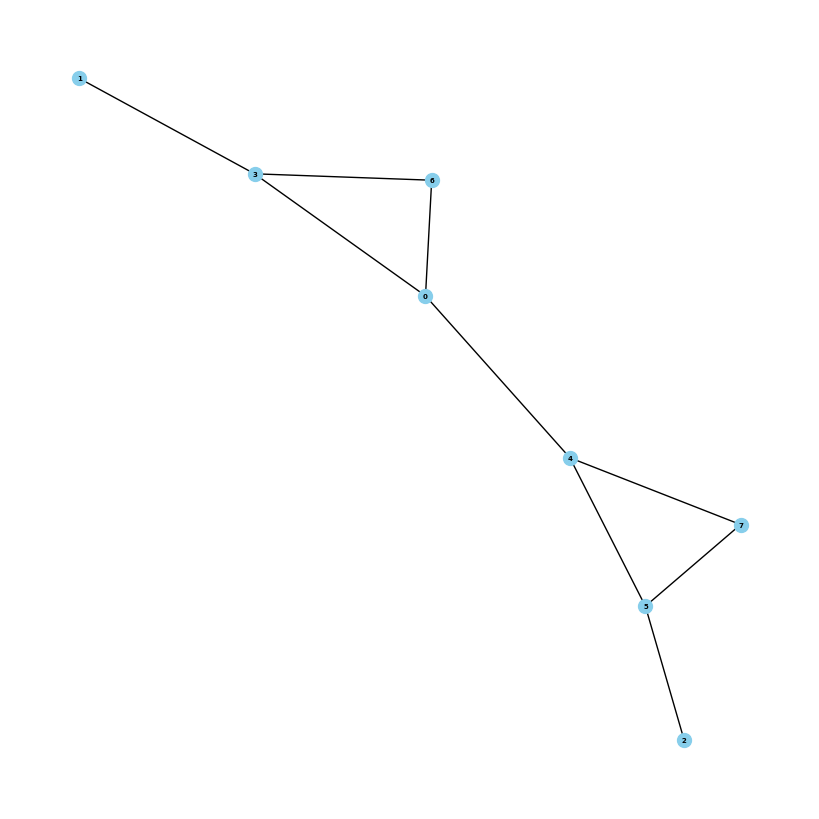

In [9]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Generate a connected random geometric graph
def generate_connected_geometric_graph(n, threshold):
    while True:
        pos = {i: (random.gauss(0, 5), random.gauss(0, 5)) for i in range(n)}
        G = nx.random_geometric_graph(n, threshold, pos=pos)
        if nx.is_connected(G):
            return G

n = 8
threshold = 2
G = generate_connected_geometric_graph(n, threshold)

plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=100, font_size=5)
plt.show()

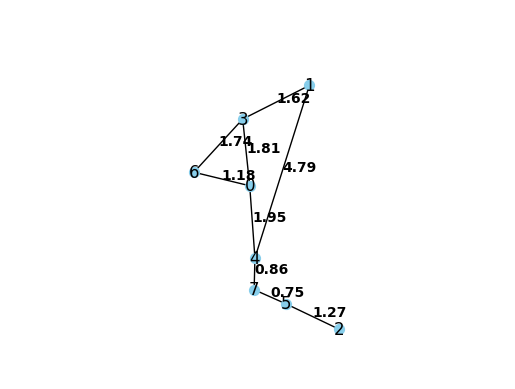

In [10]:
import math


def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')

for (u, v) in G.edges():
        G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 2)

def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = []
    queue.append(start)
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.pop(0)
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

def vsota_razdalj(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    vsota = 0
    for vertex, path in shortest_paths.items():
        vsota += distances[vertex]
    return vsota

def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = round(euclidean_distance(pos[v1], pos[v2]), 2)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        else:
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                return loop_sum(ravnovesni_graf)
    return loop_sum(graf)

# Create a sample graph
opti = ekzaktno_sum(G)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


1
1
1
1
1
1
1
1
1
3


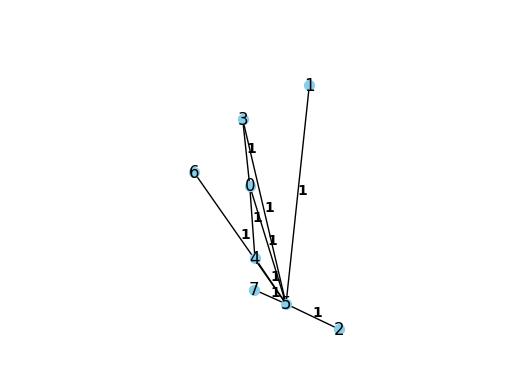

In [11]:
for (u, v) in G.edges():
        G.edges[u, v]['weight'] = 1

def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = 1
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            print('2')
                            return loop_sum(ravnovesni_graf)
                        else:
                            print('3')
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                print('1')
                                return loop_sum(ravnovesni_graf)
        
    
    return loop_sum(graf)


# Create a sample graph
opti = ekzaktno_sum(G)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()